<a href="https://colab.research.google.com/github/anzarwani/pytorch-basic-nn/blob/main/Basic_NN_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# create model class that inherits nn.Module

class Model(nn.Module):
  def __init__(self, input_features = 4, h1 = 10, h2 = 10, output_features = 3):
    super().__init__()
    self.fullyConnected1 = nn.Linear(input_features, h1)
    self.fullyConnected2 = nn.Linear(h1, h2)
    self.outputLayer = nn.Linear(h2, output_features)

  def forward(self, x):
    x = F.relu(self.fullyConnected1(x))
    x = F.relu(self.fullyConnected2(x))
    x = self.outputLayer(x)

    return x


In [3]:
torch.manual_seed(42)

model = Model()

In [4]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/iris-data.csv'
data = pd.read_csv(url)


In [5]:
data.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data['class'] = data['class'].map({'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2})

In [7]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
X = data.drop('class', axis = 1)
y = data['class']


In [10]:
X = X.values
y = y.values

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
metric = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [15]:
epochs = 100
losses = []

for epoch in range(epochs):
  y_pred = model.forward(X_train)
  loss = metric(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if epoch % 10 == 0:
    print(f'Epoch : {epoch} and loss : {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 0 and loss : 1.1047486066818237
Epoch : 10 and loss : 0.9006134867668152
Epoch : 20 and loss : 0.5908535718917847
Epoch : 30 and loss : 0.39745208621025085
Epoch : 40 and loss : 0.2688692510128021
Epoch : 50 and loss : 0.1602606624364853
Epoch : 60 and loss : 0.1014353334903717
Epoch : 70 and loss : 0.0774763822555542
Epoch : 80 and loss : 0.06779924780130386
Epoch : 90 and loss : 0.06318674981594086


Text(0.5, 1.0, 'Epochs vs Loss')

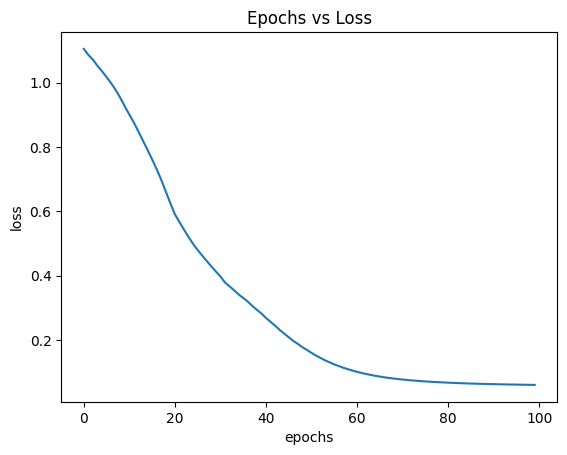

In [16]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Epochs vs Loss')

In [17]:
# eval on test data

with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = metric(y_eval, y_test)


In [18]:
loss

tensor(0.0699)

In [19]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct}')

1.) tensor([-2.7428,  5.9655,  1.6404]) 	 1
2.) tensor([ 11.3615,   4.3899, -14.1421]) 	 0
3.) tensor([-14.4820,   2.2535,  17.0645]) 	 2
4.) tensor([-3.0008,  5.6632,  1.9918]) 	 1
5.) tensor([-3.0806,  6.3320,  1.9209]) 	 1
6.) tensor([ 10.6486,   4.1538, -13.2521]) 	 0
7.) tensor([ 0.6543,  5.9726, -2.4945]) 	 1
8.) tensor([-6.8783,  4.6409,  6.9487]) 	 2
9.) tensor([-4.9940,  4.7469,  4.7316]) 	 1
10.) tensor([-0.5761,  6.0556, -1.1147]) 	 1
11.) tensor([-5.8230,  4.9073,  5.6158]) 	 2
12.) tensor([  9.9825,   3.5868, -12.3068]) 	 0
13.) tensor([ 11.2802,   4.0034, -13.9120]) 	 0
14.) tensor([ 10.1201,   3.6921, -12.4989]) 	 0
15.) tensor([ 10.7745,   4.0874, -13.3911]) 	 0
16.) tensor([-2.5377,  6.2361,  1.2333]) 	 1
17.) tensor([-10.0307,   3.1241,  11.3077]) 	 2
18.) tensor([-0.9893,  5.7877, -0.4961]) 	 1
19.) tensor([-2.8734,  5.5147,  1.9121]) 	 1
20.) tensor([-10.0139,   2.9456,  11.3394]) 	 2
21.) tensor([  9.7575,   3.7533, -12.1201]) 	 0
22.) tensor([-5.3582,  4.7492,  5.

In [20]:
new_data = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [21]:
with torch.no_grad():
  print(model(new_data))

tensor([ 10.0005,   3.6289, -12.3509])


In [22]:
with torch.no_grad():
  y_eval = model.forward(new_data)


y_eval

tensor([ 10.0005,   3.6289, -12.3509])